## Анализ маркетинговой кампании банка

Мы исследуем датасет **bank-additional-full.csv**.  
Цель кампании — предложить клиентам оформить срочный депозит.  

Основной вопрос анализа: **какие факторы влияют на согласие клиента ("yes")**.

# скачиваем библиотеки

In [1]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Set2")
pd.set_option("display.max_columns", None)

for archive in ["bank.zip", "bank-additional.zip"]:
    with zipfile.ZipFile(archive, 'r') as z:
        z.extractall("data")

datasets = {}
for root, dirs, files in os.walk("data"):
    for f in files:
        if f.lower().endswith(".csv") and "names" not in f.lower():
            path = os.path.join(root, f)
            # читаем как UCI: разделитель ';'
            try:
                df_tmp = pd.read_csv(path, sep=";")
            except UnicodeDecodeError:
                df_tmp = pd.read_csv(path, sep=";", encoding="latin-1")
            datasets[f] = df_tmp
            print(f"{f:30} → shape {df_tmp.shape}  |  path={path}")

print("\nНайдены файлы:", ", ".join(sorted(datasets.keys())))

if "bank-additional-full.csv" not in datasets:
    raise FileNotFoundError("Не найден bank-additional-full.csv. Смотри список найденных выше.")

df = datasets["bank-additional-full.csv"]
print("\nРаботаем с:", "bank-additional-full.csv")
print(df.info())
print(df['y'].value_counts(normalize=True) * 100)


bank-full.csv                  → shape (45211, 17)  |  path=data\bank-full.csv
bank.csv                       → shape (4521, 17)  |  path=data\bank.csv
bank-additional-full.csv       → shape (41188, 21)  |  path=data\bank-additional\bank-additional-full.csv
bank-additional.csv            → shape (4119, 21)  |  path=data\bank-additional\bank-additional.csv

Работаем с: bank-additional-full.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


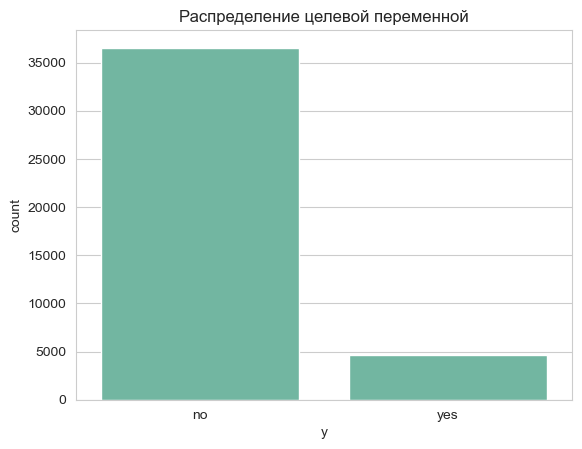

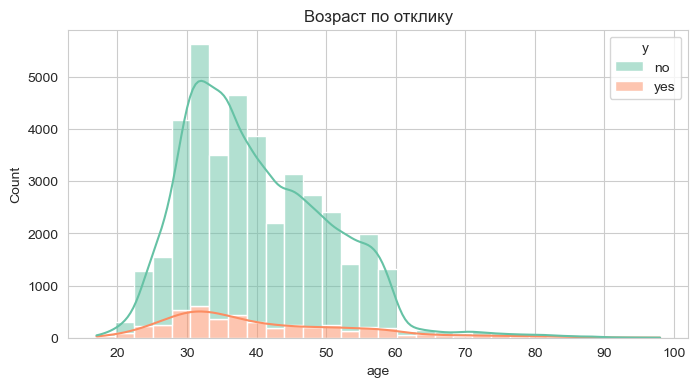

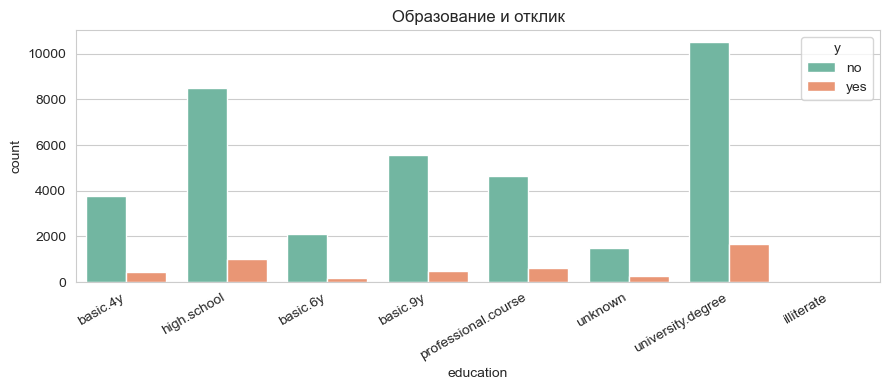

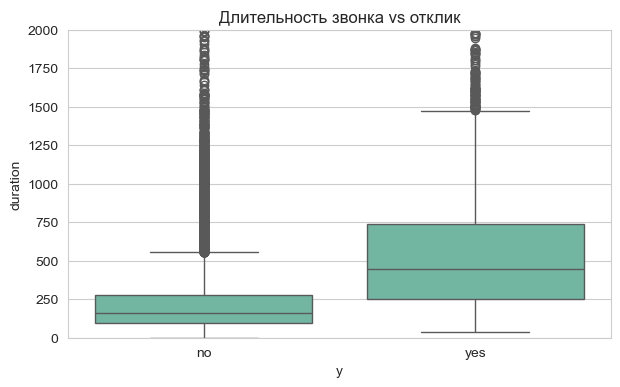

In [28]:
display(df.head())
display(df.describe(include="all").T)

ax = sns.countplot(data=df, x="y")
ax.set_title("Распределение целевой переменной")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data=df, x="age", hue="y", bins=30, kde=True, multiple="stack")
plt.title("Возраст по отклику")
plt.show()

plt.figure(figsize=(9,4))
sns.countplot(data=df, x="education", hue="y")
plt.title("Образование и отклик")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="y", y="duration")
plt.title("Длительность звонка vs отклик")
plt.ylim(0, 2000)
plt.show()


### Базовый уровень конверсии

- Всего в датасете ~41 000 звонков.  
- Доля успешных исходов — ~11%.  
- Доля неуспешных — ~89%.

**Вывод:** кампания низкоэффективна, только 1 клиент из 9 соглашается.


### Возраст клиентов

- Основная масса клиентов приходится на возраст от 30 до 40 лет.  
- Среди клиентов старшего возраста (>50 лет) доля откликов выше чем клиенты возраста <30 лет.  

**Вывод:** вероятность согласия растёт с возрастом. Старшие клиенты более склонны к открытию депозита.


### Образование

- Наибольшая конверсия у клиентов с высшим образованием.  
- Также велика конверсия и учеников старших классов в связи с поступлением в университет и дальнейшей оплае образования

**Вывод:** уровень образования положительно влияет на вероятность согласия.


### Длительность звонка

- Успешные звонки в среднем значительно длиннее, чем неуспешные.  (можно сравнить по их медианам)
- Долгие разговоры сильно увеличивают шанс нна успе.  



In [27]:
conv_by_calls = (
    df.groupby("campaign")['y']
      .apply(lambda x: (x == 'yes').mean() * 100)
      .reset_index(name="conversion_rate")
)

# rename campaign → Calls
conv_by_calls = conv_by_calls.rename(columns={"campaign": "Calls"})

counts = df['campaign'].value_counts().reset_index()
counts.columns = ['Calls', 'clients']

# объединяем таблицы по Calls
conv_table = pd.merge(conv_by_calls, counts, on="Calls").sort_values("Calls")

display(conv_table.head(15))


,Calls,conversion_rate,clients
0,1,13.037071,17642
1,2,11.456954,10570
2,3,10.747051,5341
3,4,9.392682,2651
4,5,7.504690,1599
5,6,7.660878,979
6,7,6.041335,629
7,8,4.250000,400
8,9,6.007067,283
9,10,5.333333,225


### Конверсия от числа контактов

**Результаты:**
- При **1 звонке** конверсия ~13%.  
- При **3 звонках** конверсия падает до ~10-11%.  
- При **4 звонках и более** конверсия продолжает снижаться .  
- Есть редкие случаи 10+ звонков — конверсия там близка к нулю.

**Вывод:**  
Наибольший эффект достигается при первом контакте. Повторные звонки снижают эффективность, и после 4-5 попыток продолжать обзвон почти бессмысленно.  
